In [1]:
import flashalgorithm as fc
import numpy as np
import dill as pickle
import itertools as itool
import pdb

In [2]:
data_hc = pickle.load(open('c1toc3_70bar6C_nowater.pkl', 'rb'))
all3_data_hc = [x for x in data_hc if (x[4] != []) and (x[4][1][0] > 1e-10) and (x[4][1][1] > 1e-10)
               and (np.sum((x[4][1][0] - x[4][1][1])**2) > 1e-6)]
all3_data = [x for x in data_hc if (x[4] != [])]

In [3]:
len(all3_data_hc)
all3_data_hc[4]

[69965,
 array([ 0.        ,  0.40178571,  0.42857143,  0.16964286]),
 ('methane', 'ethane', 'propane'),
 array([ 0.40178571,  0.42857143,  0.16964286]),
 [array([[ 0.56974273,  0.40103242],
         [ 0.34202726,  0.42895959],
         [ 0.08823001,  0.170008  ]]),
  array([ 0.00446504,  0.99553496]),
  array([[ 1.        ,  0.70388381],
         [ 1.        ,  1.25416749],
         [ 1.        ,  1.92687101]]),
  31,
  8.6265899820747727e-07]]

In [4]:
def get_stable_phases(x):
    index_get = list()
    color = 'black'
    if np.sum((x[4][0][:, 0] - x[4][0][:, 1])**2) < 1e-6:
        if (x[4][1][0] > x[4][1][1]) and (x[4][1][0] > 1e-10):
            index_get.append(0)
        elif (x[4][1][1] > 1e-10):
            index_get.append(1)
    else:
        if x[4][1][0] > 1e-10:
            index_get.append(0)
        if x[4][1][1] > 1e-10:
            index_get.append(1)
    if len(index_get) == 2:
        if sorted(index_get) == [0,1]:
            color = 'blue'
        elif sorted(index_get) == [0,2]:
            color = 'green'
        elif sorted(index_get) == [0,3]:
            color = 'pink'
        elif sorted(index_get) == [0,4]:
            color = 'orange'
        elif sorted(index_get) == [1,3]:
            color = 'teal'
        elif sorted(index_get) == [1,4]:
            color = 'black'
        elif sorted(index_get) == [2,3]:
            color = 'olive'
        elif sorted(index_get) == [3,4]:
            color = 'brown'
        elif sorted(index_get) == [2,4]:
            color = 'purple'
        elif sorted(index_get) == [1,2]:
            color = 'gray'
        else:
            color = 'black'
    return index_get, color

In [5]:
def plot_tern_lines(x, 
                    tern_inds=[0,1,2], 
                    plot_ties=True, 
                    return_vals=False, 
                    include_xy=False, 
                    plot_1phase=False):
    z = x[4][0]
    if np.abs(np.sum(x[1][tern_inds]) - 1) < 1e-6:
        index_get, color = get_stable_phases(x)
        if include_xy:
            x, y = sr2xy(x[1][tern_inds[0]], x[1][tern_inds[2]])
            plt.plot(x, y, 'k.')
        if x[-1][-1] < 1e-3:
            if (len(index_get) == 2) and (color != 'black'):
                if len(z) == 3:
                    x1, y1 = sr2xy(z[0, index_get[0]], z[2, index_get[0]])
                    x2, y2 = sr2xy(z[0, index_get[1]], z[2, index_get[1]])
                else:
                    if x[1][2] == 0.0:
                        x1, y1 = sr2xy(z[0, index_get[0]], z[1, index_get[0]])
                        x2, y2 = sr2xy(z[0, index_get[1]], z[1, index_get[1]])
                    elif x[1][1] == 0.0:
                        x1, y1 = sr2xy(0, z[1, index_get[0]])
                        x2, y2 = sr2xy(0, z[1, index_get[1]])
                    elif x[1][3] == 0.0:
                        x1, y1 = sr2xy(z[0, index_get[0]], 0)
                        x2, y2 = sr2xy(z[0, index_get[1]], 0)
                        
                if plot_ties and not return_vals:
                    plt.plot([x1, x2], [y1, y2], '-', color=color)
                elif not return_vals:
                    plt.plot(x1, y1, 'r.')
                    plt.plot(x2, y2, 'b.')
                else:
                    return x1, x2, y1, y2
            elif len(index_get) == 3:
                x1, y1 = sr2xy(z[1, index_get[0]], z[0, index_get[0]])
                x2, y2 = sr2xy(z[1, index_get[1]], z[0, index_get[1]])
                x3, y3 = sr2xy(z[1, index_get[2]], z[0, index_get[2]])
                plt.plot([x1, x2, x3, x1], [y1, y2, y3, y1], '-r')
            elif len(index_get) == 1 and plot_1phase:
                if len(z) == 3:
                    x1, y1 = sr2xy(z[0, 0], z[2, 0])
                    x2, y2 = sr2xy(z[0, 1], z[2, 1])
                else:
                    if x[1][2] == 0.0:
                        x1, y1 = sr2xy(z[0, 0], z[1, 0])
                        x2, y2 = sr2xy(z[0, 1], z[1, 1])
                    elif x[1][1] == 0.0:
                        x1, y1 = sr2xy(0, z[1, 0])
                        x2, y2 = sr2xy(0, z[1, 1])
                    elif x[1][3] == 0.0:
                        x1, y1 = sr2xy(z[0, 0], 0)
                        x2, y2 = sr2xy(z[0, 1], 0)
                if return_vals:
                    return x1, x2, y1, y2

In [6]:
def sr2xy(c1, c2):
    x = c1 + 0.5 * c2
    y = c2 * (np.sqrt(3.0) / 2.0)
    return x, y
def xy2sr(x, y):
    c2 = y * (2.0 / np.sqrt(3.0))
    c1 = x - c2 * 0.5
    c3 = 1.0 - c1 - c2
    return c1, c2, c3

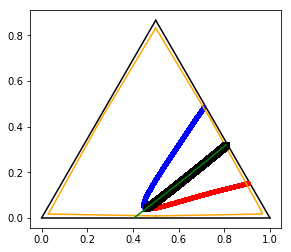

In [11]:
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
%matplotlib inline
plt.figure()
plt.clf()
brder = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
x0, y0 = sr2xy(brder[0][2], brder[0][0])
x1, y1 = sr2xy(brder[1][2], brder[1][0])
x2, y2 = sr2xy(brder[2][2], brder[2][0])
plt.plot([x0, x1], [y0, y1], 'k-')
plt.plot([x1, x2], [y1, y2], 'k-')
plt.plot([x2, x0], [y2, y0], 'k-')
phase_one = [[], []]
phase_two = [[], []]

tern_inds = [1, 2, 3]
error_count = 0
error_comp = list()
points = np.zeros([len(all3_data), 2])
for ii, x in enumerate(all3_data):
    x_pt, y_pt = sr2xy(x[1][1], x[1][3])
    points[ii, 0] = x_pt
    points[ii, 1] = y_pt
    if x[1][2] == 1e6:
        import pdb
        pdb.set_trace()
    try:
        x1, x2, y1, y2 = plot_tern_lines(x, tern_inds=tern_inds, return_vals=True, include_xy=False)
#         print(x)
        phase_one[0].append(x1)
        phase_one[1].append(y1)
        phase_two[0].append(x2)
        phase_two[1].append(y2)
    except:
        error_count += 1
        error_comp.append(x)
plt.plot(phase_one[0], phase_one[1], 'r.')
plt.plot(phase_two[0], phase_two[1], 'b.')
hull = ConvexHull(points)
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], '-', color='orange')

midpt_data = [[(x + y)/2 for x, y in zip(phase_one[0], phase_two[0])], 
              [(x + y)/2 for x, y in zip(phase_one[1], phase_two[1])]]
plt.plot(midpt_data[0], midpt_data[1], '-s', color='black')
z = np.polyfit(midpt_data[0], midpt_data[1], 2)
p = np.poly1d(z)
x_p = np.linspace(0, 1, 200)
y_pred = p(x_p)
comps = zip(*xy2sr(x_p, y_pred))
valid_inds = [(np.min(comp) >=0) and (np.max(comp) <=1) and (np.sum(comp) == 1) for comp in comps]
plt.plot(x_p[valid_inds], y_pred[valid_inds], '-', color='green')
# extra_data = pickle.load(open('c1c3_1comp.pkl', 'rb'))
# plot_tern_lines([0, 0, 0, 0, extra_data])
plt.axis('scaled')
# plt.text(-0.06, 0, 'C2')
# plt.text(1.0, 0, 'C1')
# plt.text(0.5, 0.87, 'C3')



# plt.ylim([0, 0.25])
# plt.xlim([0.35, 0.65])

# plt.ylim([0.85, 0.88])
# plt.xlim([0.48, 0.52])
plt.savefig('test.svg')
plt.show()

In [8]:
error_comp

[[1617,
  array([ 0.        ,  0.01010101,  0.49494949,  0.49494949]),
  ('methane', 'ethane', 'propane'),
  array([ 0.01010101,  0.49494949,  0.49494949]),
  [array([[ 0.01010101,  0.01010101],
          [ 0.49494949,  0.49494949],
          [ 0.49494949,  0.49494949]]),
   array([  1.00000000e-10,   1.00000000e+00]),
   array([[ 1.,  1.],
          [ 1.,  1.],
          [ 1.,  1.]]),
   7,
   1.3359772038645801e-09]],
 [1618,
  array([ 0.        ,  0.01020408,  0.48979592,  0.5       ]),
  ('methane', 'ethane', 'propane'),
  array([ 0.01020408,  0.48979592,  0.5       ]),
  [array([[ 0.01020408,  0.01020408],
          [ 0.48979592,  0.48979592],
          [ 0.5       ,  0.5       ]]),
   array([  1.00000000e-10,   1.00000000e+00]),
   array([[ 1.,  1.],
          [ 1.,  1.],
          [ 1.,  1.]]),
   7,
   1.3236643205127852e-09]],
 [1619,
  array([ 0.        ,  0.01020408,  0.5       ,  0.48979592]),
  ('methane', 'ethane', 'propane'),
  array([ 0.01020408,  0.5       ,  0.4897959

In [12]:
midpt_data

[[0.56303190840963813,
  0.55697660077873912,
  0.56268314781033602,
  0.55635125288178022,
  0.54994707472027793,
  0.56894709555397305,
  0.54346580860967508,
  0.56886165490034613,
  0.56230144515976122,
  0.54895168129507566,
  0.54215164918551351,
  0.53525985057653347,
  0.52826951855765525,
  0.55566646127890618,
  0.54070411124670759,
  0.56188190070439059,
  0.55491332126166071,
  0.51859832723378962,
  0.5687677952568011,
  0.54785619636860639,
  0.52608411241052166,
  0.51098138999496312,
  0.53344939247042866,
  0.51573965193384264,
  0.56866420774555437,
  0.56141859202854072,
  0.55408105462312474,
  0.54664484151274917,
  0.53910191406764651,
  0.53144373310115611,
  0.5236601121785619,
  0.54529785038958967,
  0.57609875619366746,
  0.56854929733535764,
  0.56090429247495499,
  0.55315662302273183,
  0.5373189308030355,
  0.52920912075416349,
  0.52095618817396439,
  0.51254622110766723,
  0.57640502126160043,
  0.54379122562089655,
  0.56842110011732627,
  0.5603300910

In [13]:
np.sum(zip(*xy2sr(x_p[valid_inds], y_pred[valid_inds])), axis=1)

AxisError: axis 1 is out of bounds for array of dimension 0

In [14]:
zip(*[x_p[valid_inds], y_pred[valid_inds]])

In [15]:
use_comps = [np.asarray([0, c[0], c[2], c[1]]) for c in zip(*xy2sr(x_p[valid_inds], y_pred[valid_inds]))]

In [16]:
use_comps

[array([ 0.        ,  0.40574418,  0.59167382,  0.002582  ]),
 array([ 0.        ,  0.40858162,  0.58446102,  0.00695736]),
 array([ 0.        ,  0.41141619,  0.57724533,  0.01133848]),
 array([ 0.        ,  0.41424786,  0.57002675,  0.01572539]),
 array([ 0.        ,  0.41707665,  0.56280529,  0.02011806]),
 array([ 0.        ,  0.41990255,  0.55558094,  0.0245165 ]),
 array([ 0.        ,  0.42272557,  0.54835371,  0.02892072]),
 array([ 0.        ,  0.4255457 ,  0.54112359,  0.03333071]),
 array([ 0.        ,  0.42836294,  0.53389058,  0.03774648]),
 array([ 0.        ,  0.4311773 ,  0.52665469,  0.04216801]),
 array([ 0.        ,  0.43398877,  0.51941591,  0.04659532]),
 array([ 0.        ,  0.43679736,  0.51217424,  0.0510284 ]),
 array([ 0.        ,  0.43960305,  0.50492969,  0.05546726]),
 array([ 0.        ,  0.44240587,  0.49768225,  0.05991188]),
 array([ 0.        ,  0.44520579,  0.49043192,  0.06436228]),
 array([ 0.        ,  0.44800283,  0.48317871,  0.06881845]),
 array([

In [17]:
# pickle.dump(use_comps, open('70bar6C_complist.pkl', 'w'))
np.save('70bar6C_complist.npy', use_comps)